# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [44]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [45]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split

#define the X and y variables 
X = ames.drop(columns=('SalePrice'))
y = ames[['SalePrice']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2 , random_state = 42)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [46]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Fit a Linear Regression on the Training Data

In [47]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression


#initialize the model
model = LinearRegression()

In [48]:
# Your code here: fit the model to train data
model.fit(X_train,y_train)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 11,
 'coef_': array([[  25281.35255843,   38512.38334291,   88732.70008316,
          -31791.9754652 ,  -31122.39444197,   25631.33980923,
           16193.61770465, -129201.00357402,  -78656.92018797,
         -119305.12398453,  -17145.76286088]]),
 'rank_': 11,
 'singular_': array([23.59950456, 19.70993368, 10.69458645,  8.36747905,  7.89877292,
         7.05610574,  6.08741878,  5.24488937,  4.43900376,  3.75482788,
         1.91795064]),
 'intercept_': array([-852600.33496767])}

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [49]:
# Your code here: generate predictions for both sets
y_pred = model.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [50]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

2250804719.655336

If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\

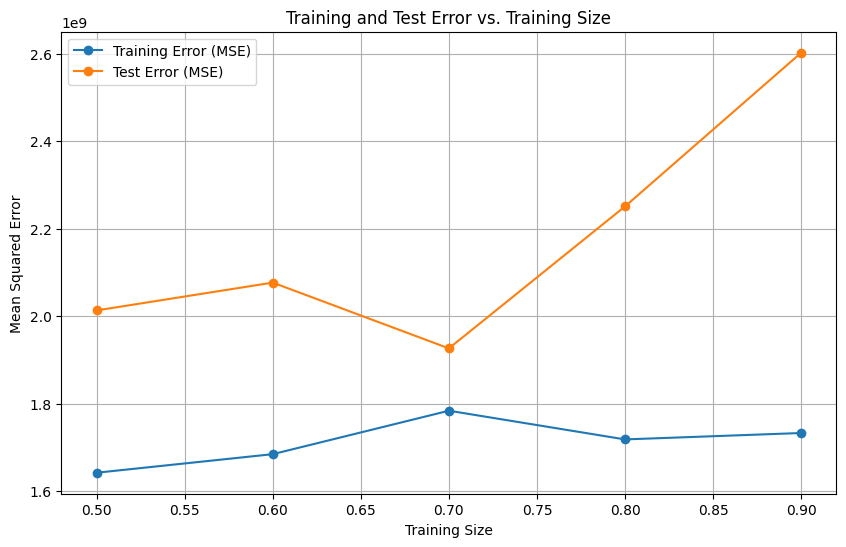

In [51]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

test_sizes = [0.5,0.4,0.3,0.2,0.1]
train_errors = []
test_errors =[]


# Iterate through the sizes
for size in test_sizes:
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    # Fit transformers
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])
    
    # Transform training data
    X_train_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)
    
    # Transform test data
    X_test_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)
    
    # Fit the model to the training data
    model.fit(X_train_transformed, y_train)
    
    # Calculate training error (MSE)
    y_train_pred = model.predict(X_train_transformed)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)
    
    # Calculate test error (MSE)
    y_test_pred = model.predict(X_test_transformed)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

#plot the training and testing error
plt.figure(figsize=(10, 6))
plt.plot([1 - ts for ts in test_sizes], train_errors, label='Training Error (MSE)', marker='o')
plt.plot([1 - ts for ts in test_sizes], test_errors, label='Test Error (MSE)', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()



### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\

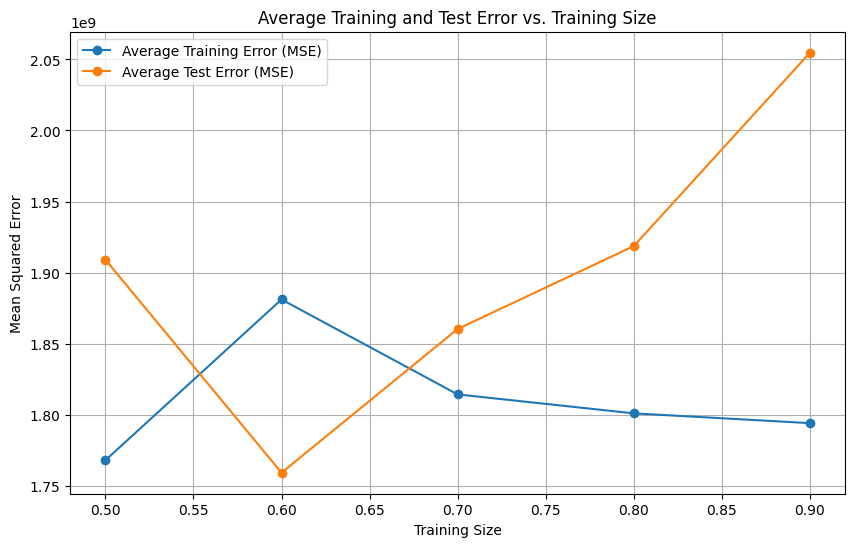

In [52]:
# Your code here
# Define the range of test sizes
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]
n_iterations = 10  # Number of iterations for each split size

# Initialize lists to store average MSE
avg_train_errors = []
avg_test_errors = []

# Iterate through the sizes
for size in test_sizes:
    train_errors = []
    test_errors = []
    
    for _ in range(n_iterations):
        # Split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=None)
        
        # Fit transformers
        log_transformer.fit(X_train[continuous])
        ohe.fit(X_train[categoricals])
        
        # Transform training data
        X_train_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)
        
        # Transform test data
        X_test_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)
        
        # Fit the model to the training data
        model.fit(X_train_transformed, y_train)
        
        # Calculate training error (MSE)
        y_train_pred = model.predict(X_train_transformed)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_errors.append(train_mse)
        
        # Calculate test error (MSE)
        y_test_pred = model.predict(X_test_transformed)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_errors.append(test_mse)
    
    # Calculate average errors for the current test size
    avg_train_errors.append(np.mean(train_errors))
    avg_test_errors.append(np.mean(test_errors))

# Plot the average training error and test error
plt.figure(figsize=(10, 6))
plt.plot([1 - ts for ts in test_sizes], avg_train_errors, label='Average Training Error (MSE)', marker='o')
plt.plot([1 - ts for ts in test_sizes], avg_test_errors, label='Average Test Error (MSE)', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Average Training and Test Error vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.